In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import logging


In [3]:
# Define the input size of the images and specify the locations of training and validation datasets.
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/Train'
valid_path = '/content/drive/MyDrive/dataset/Test'

In [4]:
#Loading the InceptionV3 model with pre-trained weights, excluding the top classification layer.
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Prevent the weights of the pre-trained layers from being updated during training.
for layer in inception.layers:
    layer.trainable = False

In [6]:
# Retrieving the number of classes from the dataset.
folders = glob('/content/drive/MyDrive/dataset/Train/*')

In [7]:
# Add custom layers for classification to the pre-trained model.
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# viewing  the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',#Measuring  how far predictions are from true labels for multi-class problems.
  optimizer='adam',             # adjusts weights to minimize loss.
  metrics=['accuracy']          #alculating how many predictions are correct.
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Loading and preparing datasets for training and validation.
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 808 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 129 images belonging to 2 classes.


In [17]:
# Train the model
logging.info("Training started...")

history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# Model Evaluation
logging.info("Training completed.")


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7361 - loss: 2.9441 - val_accuracy: 0.7054 - val_loss: 3.3661
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 218ms/step - accuracy: 0.8113 - loss: 2.2303 - val_accuracy: 0.7209 - val_loss: 3.5262
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - accuracy: 0.8482 - loss: 1.5144 - val_accuracy: 0.7132 - val_loss: 3.9082
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 237ms/step - accuracy: 0.8698 - loss: 1.1566 - val_accuracy: 0.7364 - val_loss: 3.6309
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.8469 - loss: 2.1207 - val_accuracy: 0.7209 - val_loss: 4.5653
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


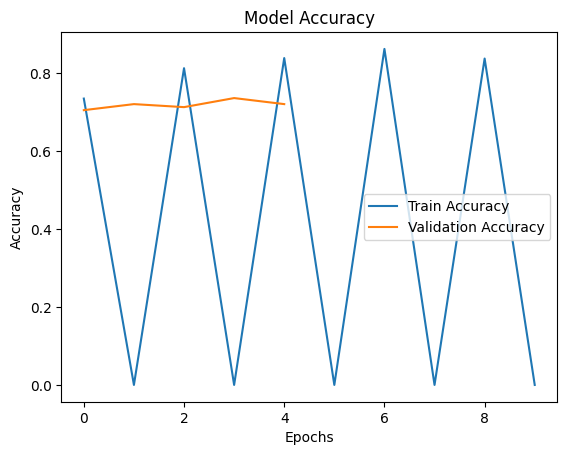

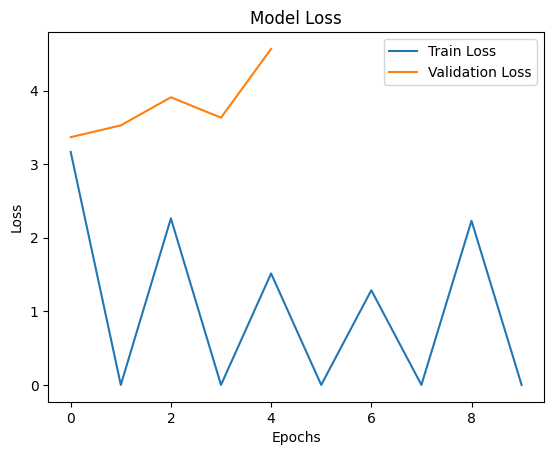

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7129 - loss: 4.1519
Test Accuracy: 72.09%


In [26]:
# Evaluating the model on the training set
train_loss, train_accuracy = model.evaluate(training_set, steps=len(training_set))
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.9082 - loss: 0.8959
Training Accuracy: 90.84%


In [20]:

save_path = 'models/breast_cancer_model.keras'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model.save(save_path)
logging.info(f"Model saved at {save_path}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 508ms/step
              precision    recall  f1-score   support

      Benign       0.47      0.47      0.47        64
   Malignant       0.48      0.48      0.48        65

    accuracy                           0.47       129
   macro avg       0.47      0.47      0.47       129
weighted avg       0.47      0.47      0.47       129



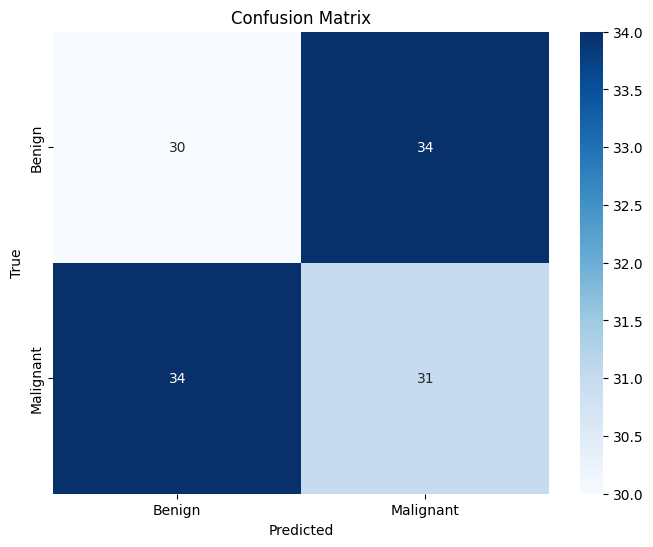

In [21]:
# Generate predictions on the test set
y_pred = model.predict(test_set, steps=len(test_set))
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_set.classes  # True labels

# Generate the classification report
logging.info("Generating classification report...")
print(classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys()))

# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Enter the image path for prediction (or 'exit' to quit): /content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549AB-400-004.png


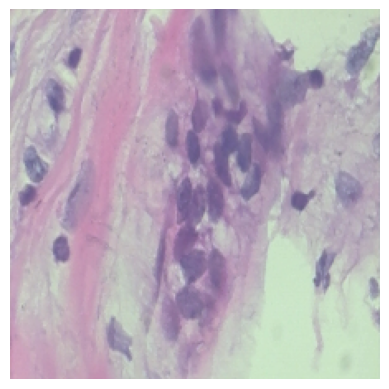

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Label: Benign


In [22]:
# Function to validate the image path
def validate_image_path(img_path):
    if not os.path.exists(img_path) or not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        raise ValueError(f"Invalid image file: {img_path}. Please provide a valid image path.")

# Predict on a new image
img_path = input("Enter the image path for prediction (or 'exit' to quit): ")
if img_path.lower() == 'exit':
    exit()

# Validate and load the image
validate_image_path(img_path)
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image and make a prediction
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
class_labels = ['Benign', 'Malignant']  # Update as needed based on your dataset
predicted_class_index = np.argmax(prediction)
predicted_label = class_labels[predicted_class_index]

print(f"Predicted Label: {predicted_label}")


Enter the image path for prediction (or 'exit' to quit): /content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549CD-400-009.png


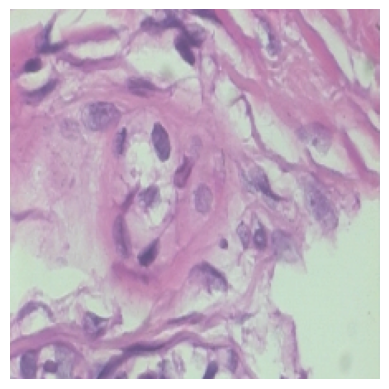

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: Benign


In [23]:
# Function to validate the image path
def validate_image_path(img_path):
    if not os.path.exists(img_path) or not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        raise ValueError(f"Invalid image file: {img_path}. Please provide a valid image path.")

# Predict on a new image
img_path = input("Enter the image path for prediction (or 'exit' to quit): ")
if img_path.lower() == 'exit':
    exit()

# Validate and load the image
validate_image_path(img_path)
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image and make a prediction
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
class_labels = ['Benign', 'Malignant']  # Update as needed based on your dataset
predicted_class_index = np.argmax(prediction)
predicted_label = class_labels[predicted_class_index]

print(f"Predicted Label: {predicted_label}")
